<a href="https://colab.research.google.com/github/LamLam1207/Assignment-2---Task-4/blob/main/stock_analyzer_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def get_stock_data(ticker):
    """Fetch historical stock data for a specific company using Yahoo Finance."""
    stock_data = yf.download(ticker, start="2020-01-01", end="2024-01-01")
    return stock_data

In [4]:

def plot_moving_averages(stock_data, window_sizes=[20, 50, 100]):
    """Plot stock price along with moving averages."""
    plt.figure(figsize=(10,6))
    stock_data['Close'].plot(label='Stock Price', color='blue')

    for window in window_sizes:
        stock_data[f"MA{window}"] = stock_data['Close'].rolling(window=window).mean()
        stock_data[f"MA{window}"].plot(label=f"MA {window}")

    plt.title(f"Stock Price and Moving Averages")
    plt.legend()
    plt.show()

Enter stock ticker symbol (e.g., AAPL for Apple): AAPL


[*********************100%***********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876114  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167610  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742653  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400551  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565201  132079200


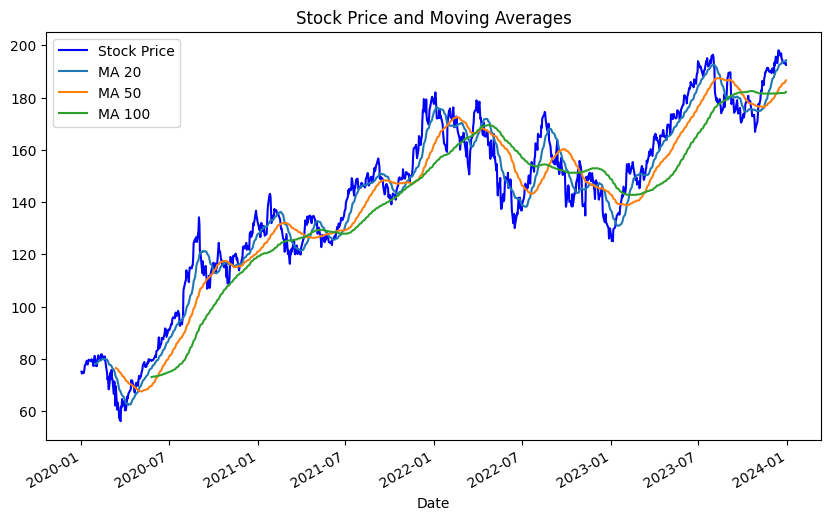

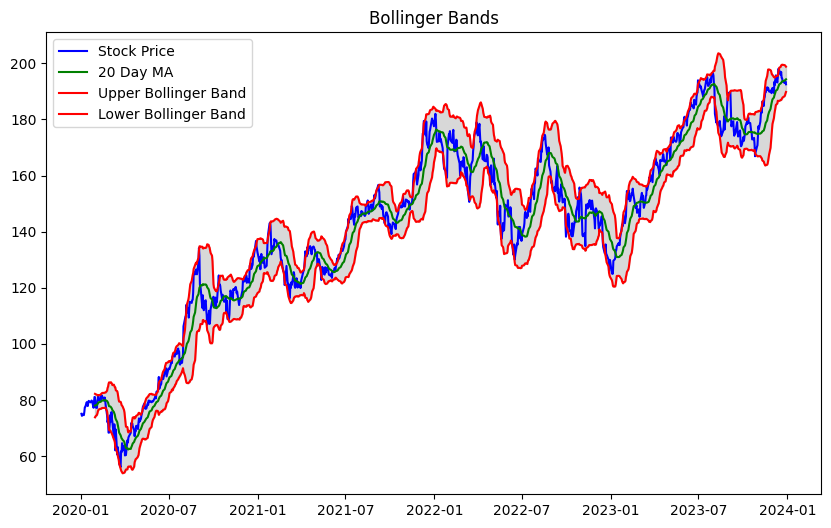

In [5]:
def calculate_bollinger_bands(stock_data, window=20):
    """Calculate Bollinger Bands for stock data."""
    stock_data['MA20'] = stock_data['Close'].rolling(window=window).mean()
    stock_data['STD20'] = stock_data['Close'].rolling(window=window).std()
    stock_data['UpperBand'] = stock_data['MA20'] + (stock_data['STD20'] * 2)
    stock_data['LowerBand'] = stock_data['MA20'] - (stock_data['STD20'] * 2)

    # Plot Bollinger Bands
    plt.figure(figsize=(10,6))
    plt.plot(stock_data['Close'], label='Stock Price', color='blue')
    plt.plot(stock_data['MA20'], label='20 Day MA', color='green')
    plt.plot(stock_data['UpperBand'], label='Upper Bollinger Band', color='red')
    plt.plot(stock_data['LowerBand'], label='Lower Bollinger Band', color='red')
    plt.fill_between(stock_data.index, stock_data['UpperBand'], stock_data['LowerBand'], color='grey', alpha=0.3)

    plt.title('Bollinger Bands')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    ticker = input("Enter stock ticker symbol (e.g., AAPL for Apple): ")
    stock_data = get_stock_data(ticker)
    print(stock_data.head())

    plot_moving_averages(stock_data)
    calculate_bollinger_bands(stock_data)